In [1]:
import pandas as pd
import operator
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
new_df = pd.read_csv("Good_Book.csv")
new_df = new_df.drop(["Year", "New ROI", "Movie_Title", "IMDB_Rating", "Female_Male_Dialogues_Ratio"],
                axis = 1)
female_df = new_df.drop(["#_of_Male_Crew", "#_of_Male_Cast", "#_of_Male_Dialogue", "Genre3_Tag_Male", 
                        "Genre2_Tag_Male", "Genre1_Tag_Male", "Sentiment_Male", "adjective_count_male",
                        "noun_count_male", "verb_count_male"], axis = 1)

In [3]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
Genre1_Tag_Female         324 non-null float64
Genre2_Tag_Female         324 non-null float64
Genre3_Tag_Female         324 non-null float64
#_of_Female_Cast          324 non-null int64
#_of_Female_Dialogue      324 non-null int64
#_of_Female_Crew          324 non-null int64
Sentiment_Female          324 non-null float64
noun_count_female         324 non-null float64
verb_count_female         324 non-null float64
adjective_count_female    324 non-null float64
dtypes: float64(7), int64(3)
memory usage: 25.4 KB


In [4]:
df_corr = female_df.corr()

In [5]:
eval_corr, evect_corr = np.linalg.eig(df_corr)
idx_corr = eval_corr.argsort()[::-1]
eval_corr = eval_corr[idx_corr]
evect_corr = evect_corr[:, idx_corr]

In [6]:
eval_corr ## Eigen Values for the correlation matrix

array([2.97030942, 1.64057365, 1.40592414, 1.03444544, 0.91526066,
       0.7336573 , 0.52225732, 0.47439811, 0.21031353, 0.09286043])

In [7]:
evect_corr.round(3) ## Eigen Vector for the correlation matrix

array([[-0.111, -0.312, -0.285, -0.46 , -0.508, -0.525,  0.204, -0.147,
         0.021, -0.016],
       [ 0.019, -0.578, -0.287, -0.187,  0.14 ,  0.207, -0.647,  0.249,
         0.063, -0.029],
       [ 0.099, -0.559, -0.206,  0.168,  0.324,  0.241,  0.659, -0.085,
         0.011,  0.046],
       [-0.286,  0.132, -0.497,  0.265, -0.148,  0.28 , -0.183, -0.671,
        -0.005, -0.012],
       [-0.227,  0.211, -0.529,  0.339, -0.207, -0.012,  0.152,  0.664,
         0.048,  0.008],
       [ 0.128, -0.299,  0.118,  0.709, -0.021, -0.569, -0.211, -0.096,
        -0.011,  0.01 ],
       [-0.071,  0.255, -0.367, -0.193,  0.728, -0.469, -0.034, -0.07 ,
        -0.033,  0.008],
       [-0.533, -0.121,  0.203,  0.03 ,  0.1  , -0.018,  0.051,  0.037,
        -0.082, -0.799],
       [-0.523, -0.136,  0.166, -0.006,  0.046, -0.003, -0.02 ,  0.061,
        -0.661,  0.487],
       [-0.514, -0.074,  0.223,  0.006,  0.094, -0.038,  0.012, -0.01 ,
         0.741,  0.348]])

In [8]:
U, S, V = np.linalg.svd(df_corr) ## Checking with SVD a method that is underlying Sklearn's PCA

In [9]:
def flip_sign(vec):
    for i in range(vec.shape[1]):
        if(vec[:, i].sum() < 0):
            vec[:, i] = -1 * vec[:, i]
    return vec

In [10]:
Vt = flip_sign(V.T)

In [11]:
Vt ## Eignen Vectors

array([[ 0.11131633,  0.3123158 ,  0.28475283, -0.45961441, -0.50809365,
         0.5251387 , -0.20381057,  0.14689645,  0.02093036, -0.01589733],
       [-0.01927962,  0.57836151,  0.28662579, -0.18749715,  0.14008182,
        -0.20652233,  0.64713177, -0.24879756,  0.06343198, -0.02896507],
       [-0.09852943,  0.55912998,  0.20612069,  0.16789393,  0.32444712,
        -0.24103374, -0.65900125,  0.08454974,  0.01116554,  0.04552287],
       [ 0.28612456, -0.1316212 ,  0.49720587,  0.26503274, -0.14776552,
        -0.27960525,  0.18322059,  0.67052365, -0.00493254, -0.01194756],
       [ 0.22720647, -0.21140719,  0.52930925,  0.33873348, -0.20704625,
         0.01182773, -0.15153027, -0.66362765,  0.04841276,  0.00778802],
       [-0.12771831,  0.29932098, -0.11838414,  0.70858791, -0.02099251,
         0.56886762,  0.21094602,  0.09599899, -0.0111816 ,  0.00965614],
       [ 0.07100128, -0.25535518,  0.36684437, -0.19329061,  0.7284972 ,
         0.46881791,  0.03448271,  0.07047803

In [12]:
## Setting principal components
exp = eval_corr * 100 / np.sum(eval_corr)
accsum = np.cumsum(exp)
pcnum = list(range(0, 10))
data = np.array([pcnum, eval_corr, exp, accsum])
eigenvalues = pd.DataFrame(data.T, columns = ["PC", "EigenValues", "% of Var", "Cumulative %"])

In [13]:
eigenvalues

,PC,EigenValues,% of Var,Cumulative %
0,0.0,2.970309,29.703094,29.703094
1,1.0,1.640574,16.405736,46.108831
2,2.0,1.405924,14.059241,60.168072
3,3.0,1.034445,10.344454,70.512527
4,4.0,0.915261,9.152607,79.665133
5,5.0,0.733657,7.336573,87.001706
6,6.0,0.522257,5.222573,92.224279
7,7.0,0.474398,4.743981,96.968260
8,8.0,0.210314,2.103135,99.071396
9,9.0,0.092860,0.928604,100.000000


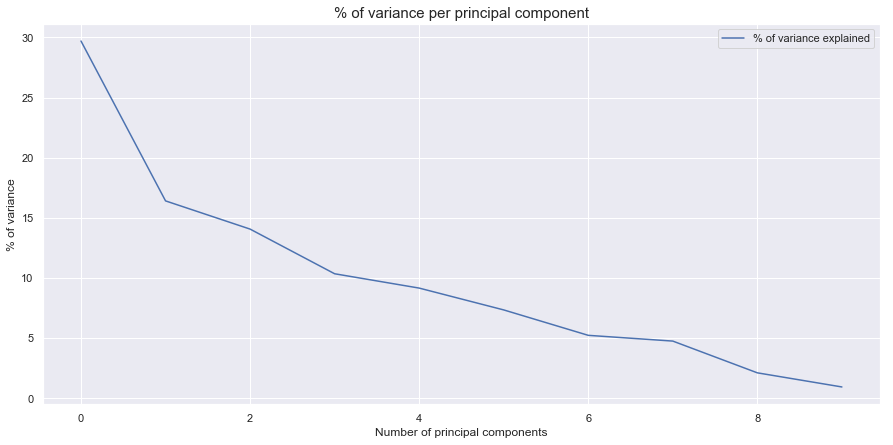

In [14]:
## Scree plot
plt.figure(figsize = [15.0, 7.0])
eachexp = eigenvalues.iloc[:, 2]
sns.lineplot(pcnum, eachexp, label = "% of variance explained")
plt.xlabel("Number of principal components")
plt.ylabel("% of variance")
plt.title("% of variance per principal component", fontsize =  15)
plt.legend()
plt.show()

In [15]:
## Loadings for the first 4 principal components.. components greater than 1
evec_corr3 = Vt[:, :4]
eval_corr3 = eval_corr[:4]
loadings = evec_corr3 * np.sqrt(eval_corr3) ## Loading matrices

In [16]:
loading_df = pd.DataFrame(loadings.T, index = ["PC1", "PC2", "PC3", "PC4"])
loading_df.T

,PC1,PC2,PC3,PC4
0,0.191849,0.400029,0.337636,-0.467463
1,-0.033228,0.740794,0.339857,-0.190699
2,-0.169811,0.716161,0.244401,0.170761
3,0.493124,-0.168587,0.589545,0.269559
4,0.391581,-0.270781,0.627611,0.344518
5,-0.220117,0.383385,-0.140370,0.720688
6,0.122368,-0.327071,0.434974,-0.196591
7,0.919421,0.154575,-0.240253,0.030429
8,0.901736,0.174133,-0.196797,-0.006601
9,0.886098,0.094708,-0.264341,0.005843


In [17]:
## Principal component score coeffs
pcscorecoeff = np.linalg.inv(df_corr).dot(loadings)

In [18]:
pcscorecoeff_df = pd.DataFrame(pcscorecoeff, columns = ["PC1", "PC2", "PC3", "PC4"])
pcscorecoeff_df

,PC1,PC2,PC3,PC4
0,0.064589,0.243835,0.240153,-0.451897
1,-0.011187,0.451546,0.241732,-0.184349
2,-0.057170,0.436531,0.173836,0.165075
3,0.166018,-0.102761,0.419329,0.260583
4,0.131832,-0.165052,0.446404,0.333046
5,-0.074106,0.233690,-0.099842,0.696691
6,0.041197,-0.199364,0.309386,-0.190045
7,0.309537,0.094220,-0.170886,0.029416
8,0.303583,0.106141,-0.139977,-0.006381
9,0.298318,0.057729,-0.188019,0.005649


## Varimax rotations

In [19]:
def varimax(loadings, normalize=True, max_iter=500, tolerance=1e-5):
        df = loadings.copy()
        column_names = df.index.values
        index_names = df.columns.values
        n_rows, n_cols = df.shape
        if n_cols < 2:
            return df
        X = df.values
        if normalize:
            normalized_mtx = df.apply(lambda x: np.sqrt(sum(x**2)),
                                      axis=1).values
            X = (X.T / normalized_mtx).T
        rotation_mtx = np.eye(n_cols)

        d = 0
        for _ in range(max_iter):
            old_d = d
            basis = np.dot(X, rotation_mtx)
            transformed = np.dot(X.T, basis**3 - (1.0 / n_rows) *
                                 np.dot(basis, np.diag(np.diag(np.dot(basis.T, basis)))))
            U, S, V = np.linalg.svd(transformed)
            rotation_mtx = np.dot(U, V)
            d = np.sum(S)
            if old_d != 0 and d / old_d < 1 + tolerance:
                break

        X = np.dot(X, rotation_mtx)

        if normalize:
            X = X.T * normalized_mtx
        else:
            X = X.T
        loadings = pd.DataFrame(X, columns=column_names, index=index_names).T

        return loadings, rotation_mtx

In [20]:
loadings = pd.DataFrame(loadings)
rloading, rmatrix = varimax(loadings)

In [21]:
rloading.round(3)

,0,1,2,3
0,0.134,0.630,0.034,-0.336
1,-0.010,0.833,-0.032,0.085
2,-0.107,0.659,-0.004,0.430
3,0.217,0.047,0.800,-0.043
4,0.092,-0.045,0.854,-0.013
5,-0.082,0.039,-0.011,0.852
6,-0.099,-0.016,0.404,-0.420
7,0.957,0.013,0.106,-0.010
8,0.930,0.060,0.114,-0.039
9,0.924,-0.041,0.082,-0.046


In [22]:
rloadnpmat = rloading.as_matrix()
rloadingflip = flip_sign(rloadnpmat)
rloadingflip

array([[ 0.13384037,  0.63040778,  0.03405129, -0.3359507 ],
       [-0.01027396,  0.83269769, -0.03150576,  0.08523255],
       [-0.10731348,  0.6590716 , -0.00401791,  0.42977411],
       [ 0.21729645,  0.04660533,  0.8003546 , -0.04313797],
       [ 0.09169375, -0.0445045 ,  0.85363211, -0.01302354],
       [-0.08216113,  0.03886093, -0.01107444,  0.85214309],
       [-0.09940703, -0.01623553,  0.40376326, -0.4202732 ],
       [ 0.9572769 ,  0.01260054,  0.10605266, -0.00953912],
       [ 0.92959479,  0.05992521,  0.11372703, -0.0393751 ],
       [ 0.92383903, -0.04112978,  0.0823622 , -0.04577258]])

In [23]:
def matx(mat):
    rpe = mat ** 2
    print(rpe)
    rpesum = np.sum(rpe, axis = 0)
    print(rpesum)
    ind = rpesum.argsort()
    print(ind)
    rr = mat[:, ind]
    return rr

In [24]:
varmaxrotmat = pd.DataFrame(matx(rloadingflip))
varmaxrotmat

[[1.79132440e-02 3.97413974e-01 1.15949064e-03 1.12862872e-01]
 [1.05554253e-04 6.93385447e-01 9.92612616e-04 7.26458726e-03]
 [1.15161828e-02 4.34375375e-01 1.61436318e-05 1.84705788e-01]
 [4.72177472e-02 2.17205683e-03 6.40567492e-01 1.86088426e-03]
 [8.40774359e-03 1.98065054e-03 7.28687779e-01 1.69612515e-04]
 [6.75045111e-03 1.51017224e-03 1.22643274e-04 7.26147846e-01]
 [9.88175678e-03 2.63592438e-04 1.63024772e-01 1.76629566e-01]
 [9.16379058e-01 1.58773677e-04 1.12471660e-02 9.09948851e-05]
 [8.64146479e-01 3.59103040e-03 1.29338365e-02 1.55039823e-03]
 [8.53478561e-01 1.69165845e-03 6.78353245e-03 2.09512882e-03]]
[2.73579678 1.53654273 1.56553547 1.21337768]
[3 1 2 0]


,0,1,2,3
0,-0.335951,0.630408,0.034051,0.133840
1,0.085233,0.832698,-0.031506,-0.010274
2,0.429774,0.659072,-0.004018,-0.107313
3,-0.043138,0.046605,0.800355,0.217296
4,-0.013024,-0.044505,0.853632,0.091694
5,0.852143,0.038861,-0.011074,-0.082161
6,-0.420273,-0.016236,0.403763,-0.099407
7,-0.009539,0.012601,0.106053,0.957277
8,-0.039375,0.059925,0.113727,0.929595
9,-0.045773,-0.041130,0.082362,0.923839


In [29]:
from numpy import eye, asarray, dot, sum, diag
from numpy.linalg import svd
def varimaX(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    p,k = Phi.shape
    R = eye(k)
    d=0
    for i in xrange(q):
        d_old = d
        Lambda = dot(Phi, R)
        u,s,vh = svd(dot(Phi.T,asarray(Lambda)**3 - (gamma/p) * dot(Lambda, diag(diag(dot(Lambda.T,Lambda))))))
        R = dot(u,vh)
        d = sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return dot(Phi, R)

In [30]:
pd.DataFrame(varimaX(rloadingflip))

,0,1,2,3
0,0.138466,0.613868,0.036649,-0.363317
1,-0.002278,0.835726,-0.030337,0.048831
2,-0.098787,0.678087,-0.005010,0.401282
3,0.227428,0.041075,0.798040,-0.039238
4,0.101796,-0.047519,0.852413,-0.004112
5,-0.077390,0.076552,-0.017367,0.849929
6,-0.096763,-0.034214,0.408562,-0.415143
7,0.958533,0.002666,0.094278,-0.013943
8,0.931243,0.048906,0.102655,-0.045595
9,0.924101,-0.052211,0.071205,-0.047850


## Remaining

In [ ]:
def indicator_weights(loadings, eigenvalues):
    